<a href="https://colab.research.google.com/github/ErikGumilar/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://theonebrief.com/wp-content/uploads/2017/03/aon_medical_costs_article_header_V3.jpg)

# **Medical Cost and Relation of Phenomenon on Indonesia**

**Hi, There!!**

As a Indonesia citizen I clearly remember of the news from Sri Mulyani as a Minister of Finance.

She said in last december of 2021 on [Finansial](https://finansial.bisnis.com/read/20211213/215/1477267/sri-mulyani-konsumsi-rokok-bebani-bpjs-kesehatan-hingga-rp156-triliun), "Cigarette consumption burden BPJS Kesehatan (Social Health Insurance Administration Body) to reach 15.6 trillion rupiah."

![](https://images.bisnis-cdn.com/posts/2021/12/13/1477267/cukai-rokok_190821.jpg)

"This means that 20 to 30 percent of the PBI subsidy [PBI stand for Penerima Bantuan Iuran] JKN, Rp. 48.8 trillion is to pay for treatment due to the effects of smoking," Sri Mulyani continued at a press conference on the 2022 Tobacco Excise Policy.

The statement made by Sri Mulyani was confirmed by the BPJS Kesehatan Supervisory Board. According to Achmad Yurianto in [merdeka.com](https://www.merdeka.com/khas/dewas-bpjs-kesehatan-di-negara-maju-pasien-penyakit-akibat-rokok-dibebani-biaya-wawancara-khusus.html), "Health costs due to smoking reach Rp. 17.9 trillion to Rp. 27.7 trillion a year. BPJS Kesehatan must bear Rp. 10.5-15.6 trillion of the total health costs of diseases caused by smoking."


This statement has existed in 2017 to 2020, where the Ministry of Health as a pioneer in the passage of BPJS Kesehatan contributions stated that patients with a history of smoking cause excessive burdens on BPJS Kesehatan expenditures.

**Academic Review of Disease Cost due Cigarette**

[Kadek Ida Krisnadewi](https://journal.ugm.ac.id/majalahfarmaseutik/article/view/49615) once conducted a research entitled "Estimasi Nilai Years of Life Lost (YLL) Penyakit Kanker Akibat Secondhand Smoke di Indonesia" [in English: Years of Life Lost (YLL) Estimation of Cancer Due to Secondhand Smoke in Indonesia], where Kadek found that the estimated value of years of life lost (YLL) for 6 cancers caused by passive smoking taken per gender group was found to be the largest death in lung cancer (19,823 person years), followed by colon cancer (19,007 person years), cancer pancreas (14,155 person years), stomach cancer (3,372 person years), bladder cancer (3,251 person years) and laryngeal cancer (1,242 person years).


![](https://ars.els-cdn.com/content/image/1-s2.0-S0344033820X00094-cov150h.gif)

[Yuping Zhang in Pathology - Research and Practice](https://www.sciencedirect.com/science/article/abs/pii/S0344033820307470) conducted a research article entitled "The roles of endothelin and its receptors in cigarette smoke-associated pulmonary hypertension with chronic lung disease", found that the pathogenesis of smoke-associated PH group III in chronic obstructive pulmonary disease (COPD) involves cigarette smoke exposure-induced damage to lung tissue and dysfunction of pulmonary system with increased synthesis and release of endothelin-1 (ET-1), hypoxia, inflammation, pulmonary vascular remodeling.

![](https://www.seekpng.com/png/full/148-1489515_question-meme.png)

# **Business Problems**

The phenomenon that occurred in Indonesia made the stakeholders of ABC, Inc. ask for opinions about the anticipation that can be done to prevent the occurrence of insurance claims that swell. According to the stakeholders, the occurrence of a deficit in the BPJS Kesehatan budget run by the government has occurred since the first year BPJS Kesehatan was launched, in 2014.

According to ABC, inc. advisers, the deficit that occurred in the BPJS Kesehatan budget because the cash inflows and outflows did not match the predictions was made previously. With input from the company's Advisor, President Director of ABC, inc. asked the Business Intelligence division to analyze the phenomena that occurred and also try to predict the occurrence of insurance claims in the future.

Formulation of the problem:
1. Is it true that there is a phenomenon of swelling BPJS claims due to the increasing number of people who are sick from active smoking?
2. Will active smoking continue to be the main cause of swelling in health claims in the future?
3. How to deal with swelling that occurs in ABC, Inc.?




## **Load Library and Dataset**

In [85]:
# Using pandas and numpy as basic Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from scipy.stats import zscore

# Using Several Regression Models to know the Cost of several factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [86]:
# Import dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('insurance.csv')
data.head(10) 

Saving insurance.csv to insurance (1).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


***Dataset Description***


1.   age: age of primary beneficiary
2.   sex: insurance contractor gender, female, male
3.   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4.   children: Number of children covered by health insurance / Number of dependents
5.   smoker: Smoking
6.   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7.   charges: Individual medical costs billed by health insurance

## **Data Understanding & Preparation**

In [3]:
# See size of Dataset
data.shape

(1338, 7)

In [4]:
print("There is", data.shape[0], "observation and", data.shape[1], "columns in this dataset")

There is 1338 observation and 7 columns in this dataset


In [5]:
# Data types Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Statistical Summary
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
numerical= data.select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')

Numerical Columns:  Index(['age', 'bmi', 'children', 'charges'], dtype='object')


Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [8]:
print(data['age'].value_counts())
print(data['sex'].value_counts())
print(data['children'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### **Label Encoder**

[Dinesh Yadav](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) published on Toward Data Science enrich our knowledge by releasing an article about Label Encoder. He said, "in many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results."

In [9]:
from sklearn.preprocessing import LabelEncoder
# Sex Label Encoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# Smoker Label Encoder
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
# Region Label Encoder
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [10]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### **Data Cleaning**

Data cleaning is a critically important step in any machine learning project. Data Cleaning always refers to *identifying* and *correcting errors* in the Dataset that may negatively *impact* to our *predictive model*. But not only to *predictive model* that will be impacted by errors and also another models will be *impacted by errors of the dataset*.

#### **Missing Value**

Missing values can heavily influence your models, depending on the way that you handle them. The fact the value is missing may have significant meaning within your model and your target problem. (source: [Zachary Warnes on Medium](https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb))


In [11]:
# Missing value Check on all of variable
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on checking for missing values, this dataset does not have a missing value in each column or it can be said to be a Clean Dataset.

#### **Duplicated Rows**

The same case as Missing Values, duplicated data is one of the problems in the dataset that needs to be eliminated to avoid misreading in our Machine Learning.
Duplication of data will cause prediction errors and also misclassification in machine learning.

In [12]:
# Checking for Duplicated Rows
data.duplicated().sum()

1

There is 1 duplicated data contain in our Dataset. The only option to handle Duplicated Data is removing the data.

In [13]:
# Dropping duplicated data with None Subset
data.drop_duplicates(subset = None, keep = False, inplace = True)

#Checking size of Data
data.shape

(1336, 7)

## **Data Visualization**

Based on [Tableau](https://www.tableau.com/learn/articles/data-visualization#:~:text=Data%20visualization%20helps%20to%20tell,and%20highlighting%20the%20useful%20information.) article, it said "Data visualization helps to tell stories by curating data into a form easier to understand, highlighting the trends and outliers. A good visualization tells a story, removing the noise from data and highlighting the useful information."

### **Data Visualization of Outlier**

An outlier can also be identified through visualization using a box plot.

#### **Outlier Visualization of Age Column**

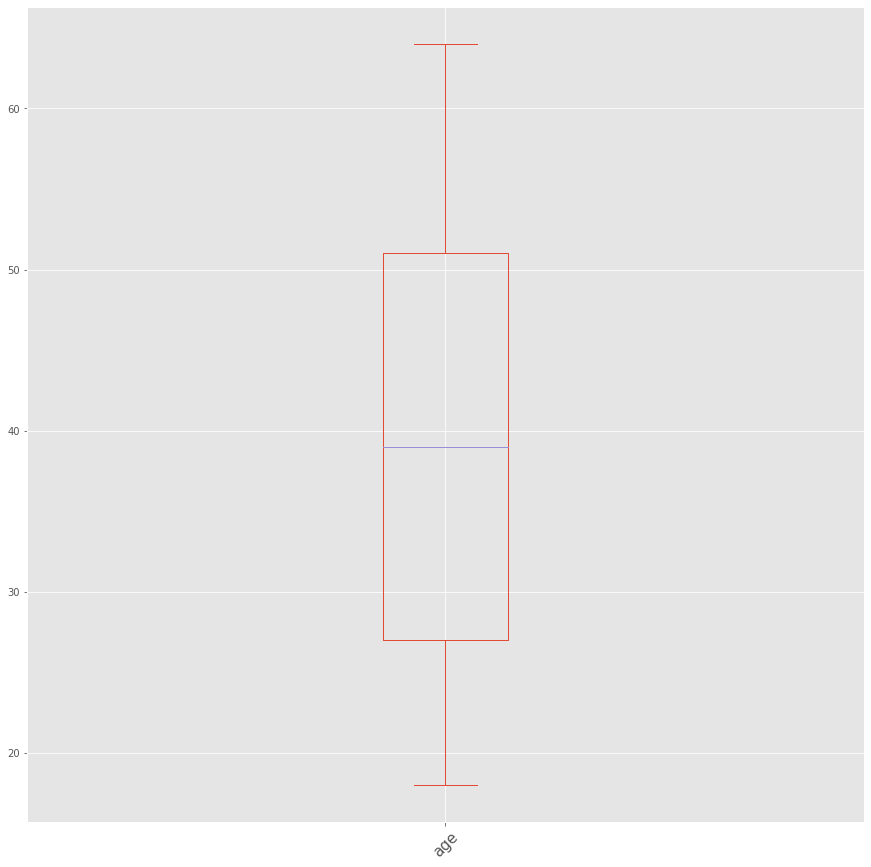

<Figure size 2160x1080 with 0 Axes>

In [14]:
# Outlier of Age Column

plt.style.use('ggplot')
ax = data['age'].plot.box(figsize=(15, 15))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

Seen from the visualization, no outliers were found in the age column. Where there is no data below the lower limit and no data above the upper limit.

In [15]:
# Check using Z-Score Method

def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [16]:
out_zscore(data.age)

Total number of outliers are 0


The result on boxplot visualization and Z-Score method have similar value of 0 outlier.

#### **Outlier Visualization of BMI Column**

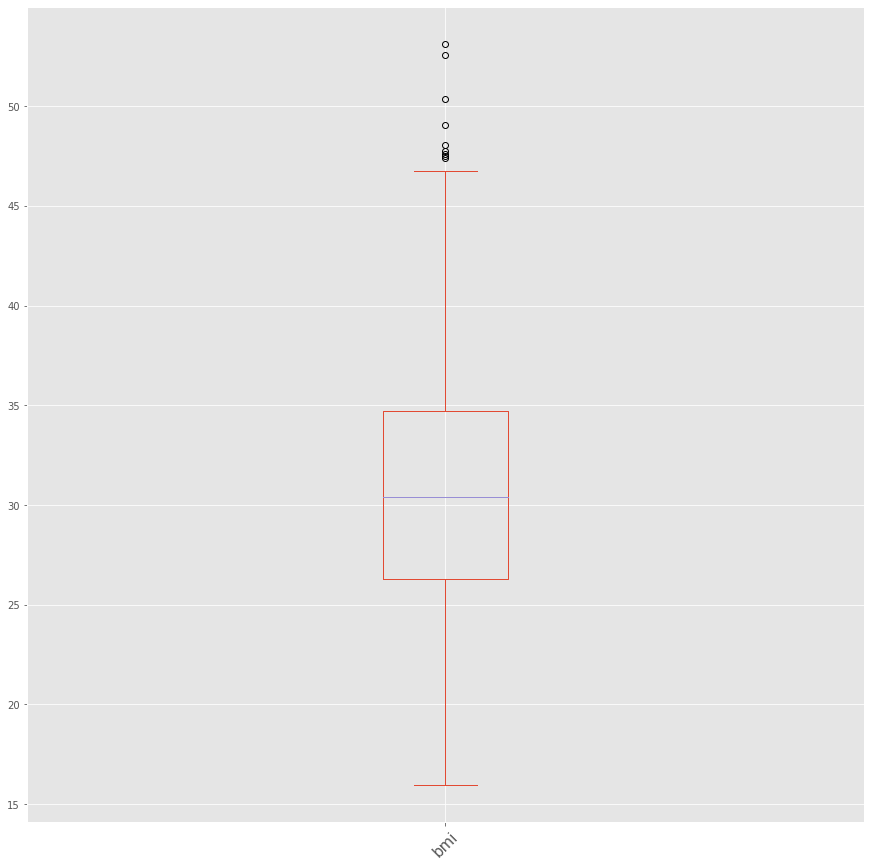

<Figure size 2160x1080 with 0 Axes>

In [17]:
# Outlier of BMI (Body Mass Index) Column
plt.style.use('ggplot')
ax = data['bmi'].plot.box(figsize=(15, 15))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

From the visualization, it can be seen that there are several outliers in the BMI column. The number of outliers can be determined using the Z-Score method.

In [18]:
out_zscore(data.bmi)

Total number of outliers are 4


Based on boxplot visualization, there are a lot of outlier but when it used of Z-Score, it tells us there are only 4 outlier.

[Mahbubul Alam](https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510) once wrote an article about the Z-Score method on Toward Data Science. In his writing, Mahbubul Alam said, there is a threshold determination in the use of Z-Score where the use of different threshold values will affect the ability of the Z-Score method to detect outliers in a data. Remember, determination of this threshold will make the calculation of the Z-Score method very sensitive.

So it's really common if the result will be different from each method to other method.

#### **Outlier Visualization of Children Column**

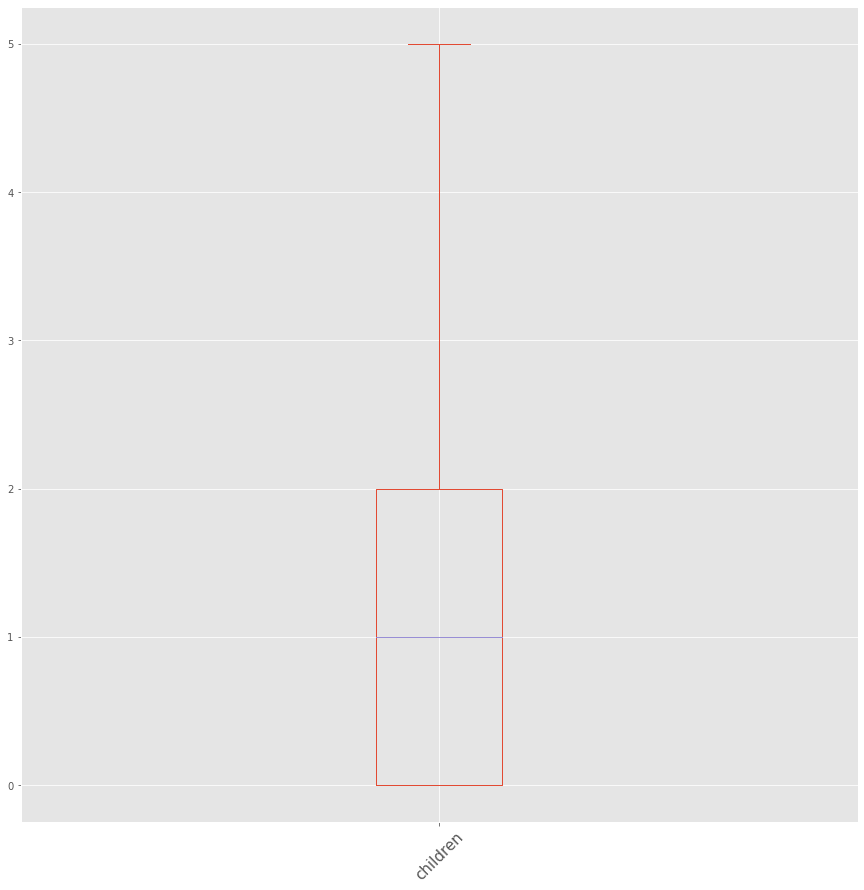

<Figure size 2160x1080 with 0 Axes>

In [19]:
# Outlier of Children Column
plt.style.use('ggplot')
ax = data['children'].plot.box(figsize=(15, 15))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

Seen from the visualization, no outliers were found in the children column. Where there is no data below the lower limit and no data above the upper limit.

It is really common when your data only have 2 or 3 unique value.

In [20]:
out_zscore(data.children)

Total number of outliers are 18


Like [Mahbubul Alam](https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510) said, Z-Score method really sensitif to detect an outlier.

#### **Outlier Visualization of Charges Column**

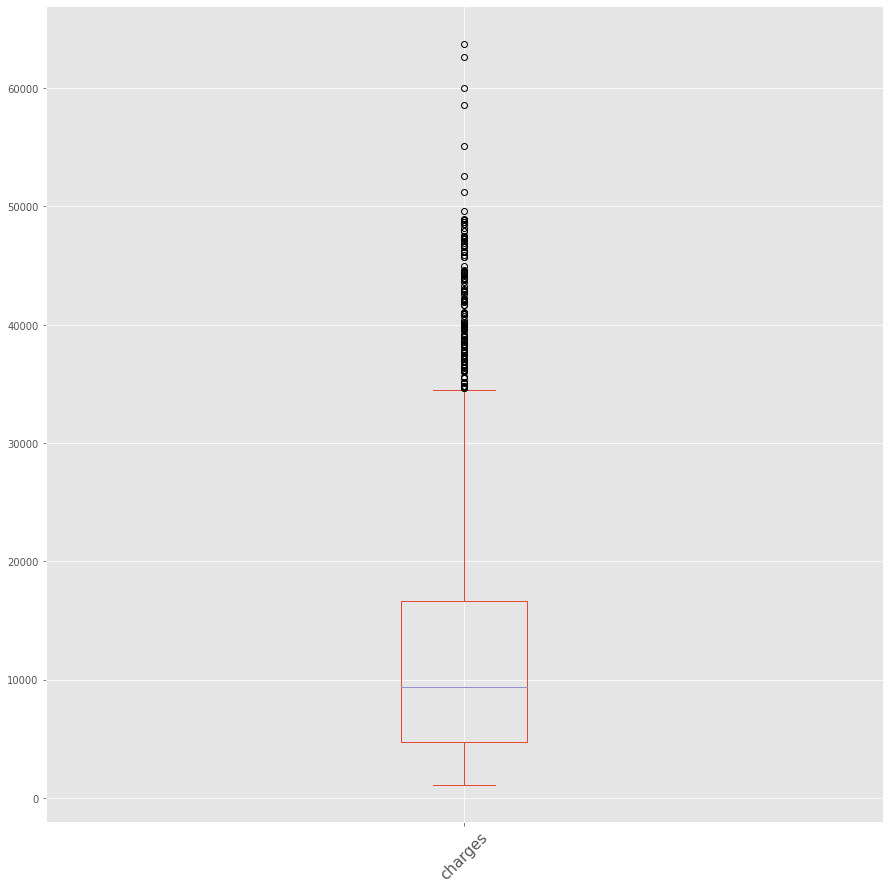

<Figure size 2160x1080 with 0 Axes>

In [21]:
# Outlier of Charges Column
plt.style.use('ggplot')
ax = data['charges'].plot.box(figsize=(15, 15))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

There are a lot of outlier with Box Plot.

In [22]:
# Use Z-Score Method
out_zscore(data.charges)

Total number of outliers are 7


In outlier detection using the Z-Score method, only 7 outliers were found in the charges column.

### **Data Visualization of Distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f880c605f50>,
      dtype=object)

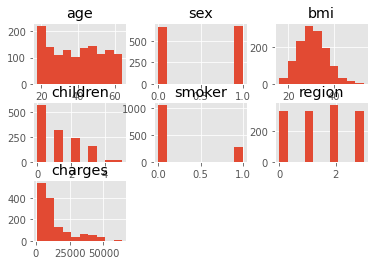

In [23]:
# Using histogram to show Normalized Distribution 

data.hist()

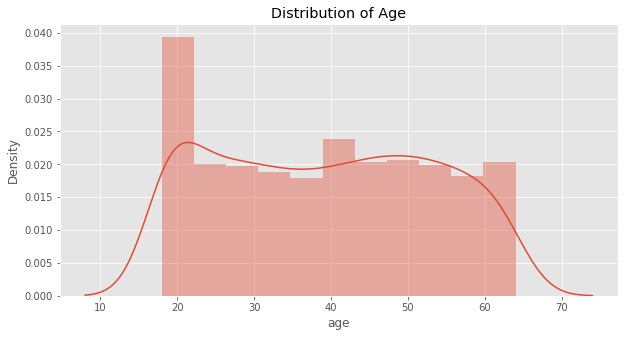

/n


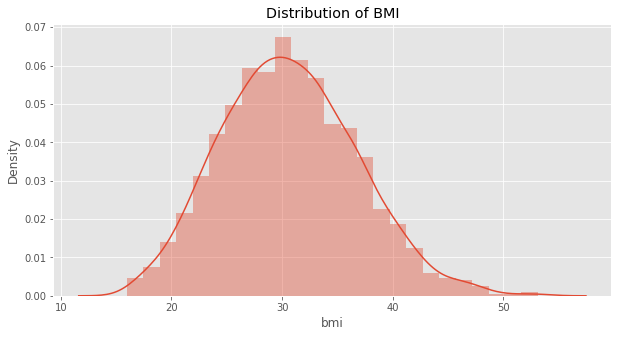

/n


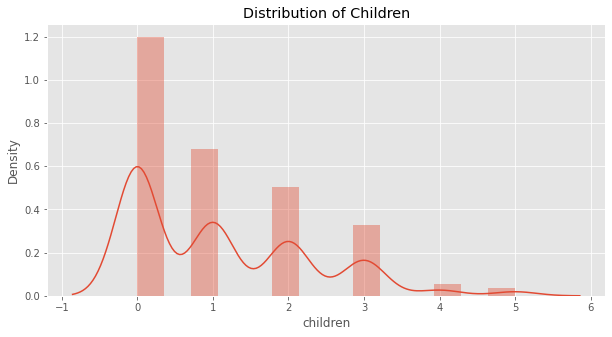

/n


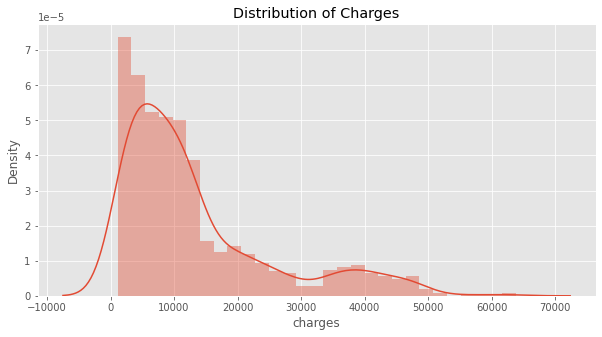

In [24]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Age")
sns.distplot(data['age'])
plt.show()

print('/n')

plt.figure(figsize=(10,5))
plt.title("Distribution of BMI")
sns.distplot(data['bmi'])
plt.show()

print('/n')

plt.figure(figsize=(10,5))
plt.title("Distribution of Children")
sns.distplot(data['children'])
plt.show()

print('/n')

plt.figure(figsize=(10,5))
plt.title("Distribution of Charges")
sns.distplot(data['charges'])
plt.show()

### **Data Visualization Categorical and Continuous (Numerical)**

This visualization to show relation between Categorical variables such as smoker, sex, and region.

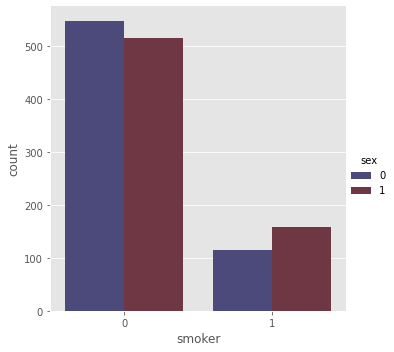

In [25]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="icefire", data=data)

Based on the visualization of the number of **Smokers** classified by **Sex**, when code "1" representative of Male/Man and code "0" representative of Female/Woman. Now we know, a lot of smoker on this dataset is clasified by gender is **dominated by Woman**.

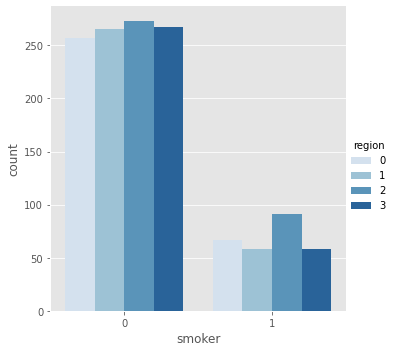

In [26]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette="Blues", data=data)

By region, the Southeast region has a higher number of smokers than other regions. Followed by the Northeast region.

Text(0.5, 1.0, 'Comparison of Gender to Charges Issued')

<Figure size 720x360 with 0 Axes>

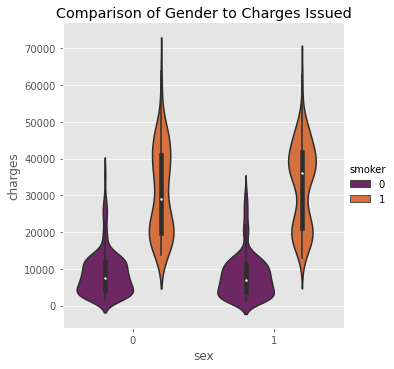

In [27]:
plt.figure(figsize=(10,5))
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'inferno')
plt.title("Comparison of Gender to Charges Issued")

Visualization was carried out to see the comparison of **Gender** to **Health Charges** issued, it was found that the largest expenditure was found in patients who had a **history of Smoking** and occurred in both sexes being compared.

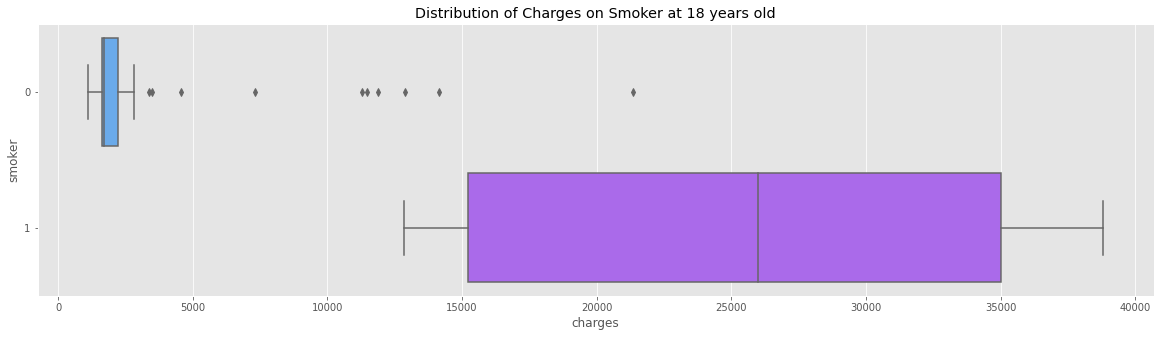

In [28]:
 plt.figure(figsize=(20,5))
 plt.title("Distribution of Charges on Smoker at 18 years old")
 sns.boxplot(
     x='charges', y='smoker', data=data[(data.age == 18)], orient = 'h', palette = 'cool')

Why I choose to pick 18 years old to compare between smoker and non-smker?

The count of 18 years old in column of age, are the largest.

Comparison of smokers and non-smokers, at the age of 18 years who have a history of smoking habits also incur large and inflated costs compared to non-smokers.

### **Visualization of Correlation Value**

[Kristoffer Magnusson](https://rpsychologist.com/) released an article on the [rpsychologist.com](https://rpsychologist.com/) page that discussed '[**Interpreting Correlation**](https://rpsychologist.com/correlation/#:~:text=An%20Interactive%20Visualization&text=Correlation%20is%20one%20of%20the,variables%20with%20a%20given%20correlation.)'. he said, Correlation is one of the most widely used tools in statistics. The correlation coefficient summarizes the association between two variables. In this visualization I show a scatter plot of two variables with a given correlation.

That's mean, a visualization on correlation is the best way to tell audience about relation between each variables.


**Correlation** is done by making "charges" as the dependent variable and other variables as independent variables.

In [29]:
data.corr()['charges'].sort_values()

region     -0.006886
sex         0.058799
children    0.066779
bmi         0.198461
age         0.297606
smoker      0.787217
charges     1.000000
Name: charges, dtype: float64

Before we jump to corrmap, we need to look up at the correlation value it self.

The greatest correlation value occurs between the relationship between smoking habits and charges.

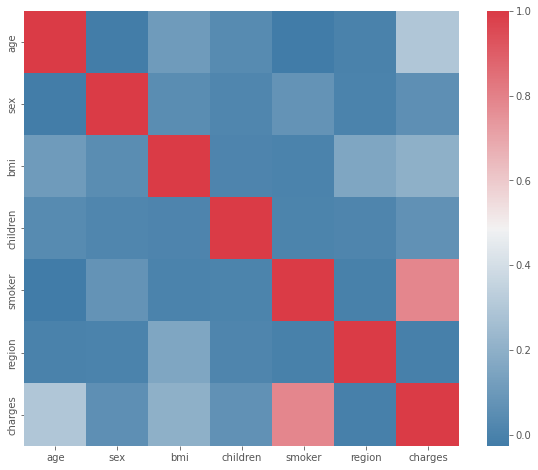

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

![![image.png](attachment:image.png)](https://media0.giphy.com/media/L33iqLKkq6FguSL9X3/200w.webp?cid=ecf05e474druzuocd1hcn9lmtw9898lzf9q0ybnrpew22x9c&rid=200w.webp&ct=g)

**Smoking** become the **greatest factor** to increase **medical charges**.

## **Models**

The outputs of prediction and feature engineering are a set of label times, historical examples of what we want to predict, and features, predictor variables used to train a model to predict the label. The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data.

### **Splitting Data into Train and Test**

In [31]:
X = data.drop('charges', axis = 1)
y = data['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

Separating data into training and testing sets is an important stage of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

### **Scaling Data**

Based on [Baijayanta Raoi articles](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35), in many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

In [32]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

### **Modeling**

We need to try and evaluate into our model, and it is really common to use more than 2 model to looking for the best fit model into our Data.

#### **Linear Regression Model**

**Linear Regression** is a basic and commonly used type of **Predictive Analysis**.  The overall idea of regression is to examine two things: 


1.   Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2.   Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?


These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula 

[ y = c + b*x ], 

where: 

y = estimated dependent variable score

c = constant

b = regression coefficient

x = score on the independent variable.

In [33]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,4.498832e+03
MSE_li_reg,4.405978e+07
RMSE_li_reg,6.637754e+03


In [34]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.85283699 0.87893521 0.85254738 0.8984235  0.87874864]


In [35]:
lin = r2_score(y_test, linear_reg_model.predict(X_test_scaled))*100
print(lin,'%')

71.31176614970653 %


#### **Gradient Boosting Regressor**

[**Tomonori Masui**](https://medium.com/@tnmasui) wrote the articles entitled "[**All You Need to Know about Gradient Boosting Algorithm - Part 1. Regression**](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)". He wrote, **gradient boosting** is one of the most popular machine learning algorithms for tabular datasets. It is powerful enough to find any nonlinear relationship between your model target and features and has great usability that can deal with missing values, outliers, and high cardinality categorical values on your features without any special treatment. While you can build barebone gradient boosting trees using some popular libraries such as XGBoost or LightGBM without knowing any details of the algorithm, you still want to know how it works when you start tuning hyper-parameters, customizing the loss functions, etc., to get better quality on your model.

In [36]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.771306e+03
MSE_gradient,2.678545e+07
RMSE_gradient,5.175466e+03


In [37]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.91656996 0.93131301 0.91581192 0.94403428 0.94765985]


In [38]:
grads = r2_score(y_test, Gradient_model.predict(X_test_scaled))*100
print(grads,'%')

82.55943753706315 %


#### **XG-Boost Regressor**

[**Vishal Morde**](https://medium.com/@vishalmorde) and [**Venkat Setty**](https://medium.com/@setgeti) have written about XGBoost with the title of "[XGBoost Algorithm: Long May She Reign!](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)".

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [39]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

[06:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Metrics
MAE_XGB,2.754042e+03
MSE_XGB,2.679448e+07
RMSE_XGB,5.176338e+03


In [40]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[06:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.91868847 0.93328843 0.91519668 0.94602419 0.94718096]


In [41]:
xgbs = r2_score(y_test, XGB_model.predict(X_test_scaled))*100
print(xgbs,'%')

82.55356181373574 %


#### **Decision Tree Regression**

In [42]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train)
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.188942e+03
MSE_tree_reg,4.410746e+07
RMSE_tree_reg,6.641344e+03


In [43]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.87840396 0.83055823 0.85989143 0.8362404  0.84832917]


In [44]:
trees = r2_score(y_test, tree_reg_model.predict(X_test_scaled))*100
print(trees,'%')

71.28072173416923 %


#### **Random Forest Regression**

[IBM, inc.]((https://www.ibm.com/docs/en/spss-modeler/SaaS?topic=nodes-random-forest-node#:~:text=Random%20Forest%C2%A9%20is%20an,sample)%20from%20the%20training%20set.) released on their learn cloud page about Random Forest.

**Random forest** is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [45]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train)
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.973138e+03
MSE_forest_reg,2.875117e+07
RMSE_forest_reg,5.362012e+03


In [46]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.91462569 0.92831106 0.91436086 0.93147428 0.92723097]


In [47]:
ranfors = r2_score(y_test, forest_reg_model.predict(X_test_scaled))*100
print(ranfors,'%')

81.27951585850664 %


#### **Polynomial Regression**

In the publication of [**Analytics Vidhya**](https://medium.com/analytics-vidhya), [**Abhigyan**](https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18) presents a literature review on Polynomial Regression.

**Polynomial Regression** is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial. **Polynomial Regression** is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.

In [48]:
poly_reg_model=PolynomialFeatures(degree = 4)
X_poly = poly_reg_model.fit_transform(X_train_scaled)
poly_reg_model.fit(X_poly, y_train)
linpoly_reg_model = LinearRegression()
linpoly_reg_model.fit(X_poly, y_train)

# Define X_test_scaled into Polynomial
X_test_scaled_poly = poly_reg_model.fit_transform(X_test_scaled)

# Prediction
y_pred = linpoly_reg_model.predict(X_test_scaled_poly)
y_pred = pd.DataFrame(y_pred)
MAE_poly_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_poly_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_poly_reg =np.sqrt(MSE_poly_reg)
pd.DataFrame([MAE_poly_reg, MSE_poly_reg, RMSE_poly_reg], index=['MAE_poly_reg', 'MSE_poly_reg', 'RMSE_poly_reg'], columns=['Metrics'])

,Metrics
MAE_poly_reg,3.653481e+03
MSE_poly_reg,3.865497e+07
RMSE_poly_reg,6.217312e+03


In [49]:
scores = cross_val_score(linpoly_reg_model, X_poly, y_train, cv=5)
print(np.sqrt(scores))

[0.85480512 0.89371136 0.77032348 0.91260188 0.90620453]


In [50]:
polys = r2_score(y_test, linpoly_reg_model.predict(X_test_scaled_poly))*100
print(polys,'%')

74.8309492585794 %


#### **Bayesian Ridge Polynomial Regression**

**Bayesian Ridge Polynomial Regression** is a **modification** in linear regression analysis by adding **Bayesian** and **Ridge** models to make the prediction and analysis results more stable.

In [51]:
# Transform X_train
bayesian_poly = PolynomialFeatures(degree = 4)
X_baye = bayesian_poly.fit_transform(X_train_scaled)
X_test_scaled_baye = bayesian_poly.fit_transform(X_test_scaled)

# Define a Bayesian Ridge Polynomial
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_baye, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [52]:
bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 0.0001,
 'lambda_1': 0.001,
 'lambda_2': 1e-07,
 'normalize': True,
 'tol': 0.001}

In [53]:
baye_confirmed = bayesian_search.best_estimator_
y_pred = baye_confirmed.predict(X_test_scaled_baye)
y_pred = pd.DataFrame(y_pred)
MAE_baye_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_baye_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_baye_reg =np.sqrt(MSE_baye_reg)
pd.DataFrame([MAE_poly_reg, MSE_poly_reg, RMSE_poly_reg], index=['MAE_poly_reg', 'MSE_poly_reg', 'RMSE_poly_reg'], columns=['Metrics'])

,Metrics
MAE_poly_reg,3.653481e+03
MSE_poly_reg,3.865497e+07
RMSE_poly_reg,6.217312e+03


In [54]:
scores = cross_val_score(baye_confirmed, X_baye, y_train, cv=5)
print(np.sqrt(scores))

[0.88647998 0.91442092 0.83084736 0.92650854 0.92653445]


In [55]:
bayes = r2_score(y_test, baye_confirmed.predict(X_test_scaled_baye))*100
print(bayes,'%')

78.85516837632288 %


### **Comparison of Model Score**

Comparing each score of the Models using basic visualization will make it easier for an Analyst to convey to company stakeholders.

Text(0.5, 1.0, 'Plotting the Model Accuracies Score')

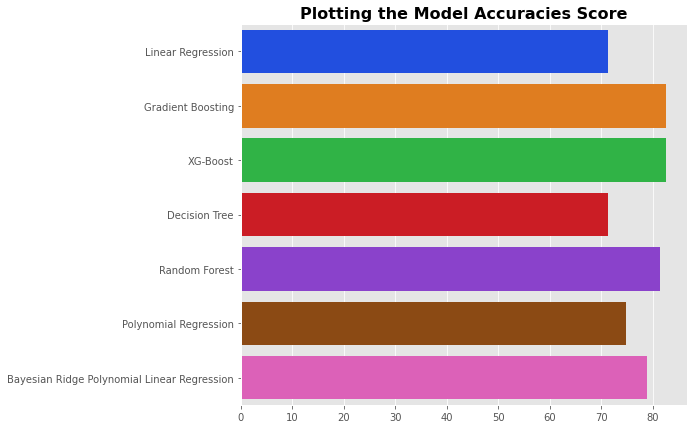

In [84]:
plt.figure(figsize= (8,7))
ac = [lin, grads, xgbs, trees, ranfors, polys, bayes]
name = ['Linear Regression','Gradient Boosting','XG-Boost','Decision Tree','Random Forest','Polynomial Regression','Bayesian Ridge Polynomial Linear Regression']
sns.barplot(x = ac,y = name,palette='bright')
plt.title("Plotting the Model Accuracies Score", fontsize=16, fontweight="bold")

**Gradient Boosting** and **XGBoost** are the models with the highest score. The values for the two models are **85.54%** and **85.55%**.

## **Features Importance**

The feature importances are MinMax scaled, put into a DataFrame, and finally plotted ordered by the mean feature importance.

### **Gradient Boost Features Importance**

Feature importance ranking


1.smoker(0.693373)
2.bmi(0.171226)
3.age(0.122252)
4.children(0.009006)
5.region(0.002491)
6.sex(0.001652)


<BarContainer object of 6 artists>

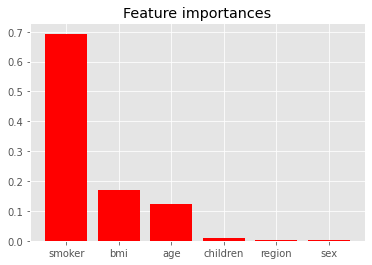

In [76]:
print('Feature importance ranking\n\n')
importances = Gradient_model.feature_importances_
std = np.std([Gradient_model.feature_importances_ for tree in Gradient_model],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(X_test_scaled.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="red", yerr=std[indices], align="center")

The calculation of the **Features Importance** analysis on **Gradient Boost** shows that **smokers** have a **big influence** on the costs incurred for **health insurance** services.

### **XGBoost Features Importance**

Feature importance ranking


1.smoker(0.897247)
2.bmi(0.046975)
3.age(0.038352)
4.children(0.009071)
5.region(0.005224)
6.sex(0.003131)


<BarContainer object of 6 artists>

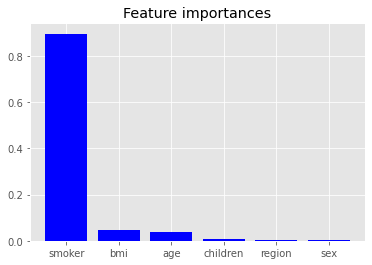

In [83]:
print('Feature importance ranking\n\n')
importances_xgb = XGB_model.feature_importances_
indices = np.argsort(importances_xgb)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_xgb_list = []
for f in range(X_test_scaled.shape[1]):
    variable = variables[indices[f]]
    importance_xgb_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances_xgb[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_xgb_list, importances_xgb[indices],
       color="blue", yerr=std[indices], align="center")

The calculation of the **Features Importance** analysis on **XGBoost** shows that smokers have a bigger influence result than Gradient Boost's result on the costs incurred for health insurance services.

This shows how much **Smoking** has **Influence** on Health and the **Incidence of other Diseases**. The risk of smoking which can cause other diseases is what makes the health burden even greater.

[Linda M. O'Keeffe et,al.](https://bmjopen.bmj.com/content/bmjopen/8/10/e021611.full.pdf) have published the results of their study under the title "Smoking as a Risk Factor for Lung Cancer in Women and Men: A Systematic Review and Meta-Analysis" in the BMJ Open. Linda explains, smoking produces the same risk of lung cancer in women compared to men. However, these data may underestimate the true risk of lung cancer among women, as the smoking epidemic has not yet reached full maturity in women. Continued efforts are needed to quantify the sex-specific association between smoking and lung cancer. In another study, [Jon A. Krosnick](https://journals.plos.org/plosone/article/file?type=printable&id=10.1371/journal.pone.0182063) pointed out, almost all Americans know that smoking has such great health risks, but many Americans still have the habit of smoking. This is because they did not find a real risk of smoking. Jon also stated that the risk of developing dangerous diseases such as cancer in smokers is very large with a risk percentage of 20%-50%. 

Those two journals above show the alignment of the results of the analysis on this dataset with previous research. With this, it was found that smoking can increase the risk of developing lung cancer and also other cancers that are aggravating the previous risk.

# **Conclusion**

Based on the dataset regarding the health costs incurred per person, it shows a tendency to increase costs that occur if a person has a smoking habit.

![](https://images.newscientist.com/wp-content/uploads/2020/05/19170055/pa-53622372_web.jpg?crop=16:9,smart&width=1200&height=675&upscale=true)

This is in line with the statement of the Minister of Finance, Sri Mulyani, who said that active smokers are the main burden in the BPJS Kesehatan budget. Even though in 2021, BPJS Kesehatan's cash budget will not experience a deficit, according to Ali Ghufron Mukti as President Director of BPJS Kesehatan, said, "This is the first time since 2016 or 2015, BPJS Kesehatan does not have a deficit. Usually we have a deficit and it is always crowded in the DPR. In December 2020, there was a positive cash flow, but if the obligations were carried out, such as debts, and so on, it would become a deficit. For 2021, we are grateful that we have started to be positive, even though we are not very healthy." [News: Meski Tak Lagi Defisit, Dirut BPJS Kesehatan Sebut Arus Kas Belum Sepenuhnya Aman](https://finansial.bisnis.com/read/20220119/215/1490818/meski-tak-lagi-defisit-dirut-bpjs-kesehatan-sebut-arus-kas-belum-sepenuhnya-aman#:~:text=Sampai%20dengan%20Desember%202021%2C%20posisi,yang%20defisit%20Rp5%2C69%20triliun.)

![](https://images.bisnis-cdn.com/posts/2022/01/19/1490818/jat-bpjs-4.jpg)

As a **company** that runs the **insurance business**, ABC, inc. is **advised to make adjustments in determining premiums** for new customers. The determination of the premium is reviewed objectively on the customer. From this suggestion, it is hoped that the expenditure and income received will have a healthy cash flow.